# OSE Baseline Model

This notebook provides a baseline model for signals.


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set path to datasets
DATA_DIR = Path('../src/ose_core/data_ingestion/extracted_datasets')

print("Libraries imported successfully!")


Libraries imported successfully!


## Signals dataset

This dataset contains company signals and events.

**Note:** Only 70.9% of companies have signals (266 out of 375). Each company can have multiple signals.

**Use case:** Event tracking, signal analysis, company activity monitoring.


In [7]:
# Load signals data
df_signals = pd.read_csv(DATA_DIR / '08_signals.csv', dtype={'siren': str, 'siret': str})

print(f"Dataset shape: {df_signals.shape}")
print(f"\nColumns: {list(df_signals.columns)}")
display(df_signals.head(10))

Dataset shape: (2133, 12)

Columns: ['company_name', 'siren', 'siret', 'continent', 'country', 'departement', 'publishedAt', 'isMain', 'type', 'createdAt', 'companies_count', 'sirets_count']


,company_name,siren,siret,continent,country,departement,publishedAt,isMain,type,createdAt,companies_count,sirets_count
0,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2021-09-30T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2020-09-07T15:14:38+02:00,1,1
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2020-09-08T00:00:00+02:00,True,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-07T15:14:12+02:00,1,1
2,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-09-21T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-20T10:45:13+02:00,1,1
3,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2018-04-05T11:16:18+02:00,1,1
4,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'E', 'id': 5, 'label': 'Créations & o...",2018-04-05T11:15:32+02:00,1,1
5,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'H', 'id': 8, 'label': 'Activité inte...",2018-04-05T11:14:31+02:00,1,1
6,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2014-05-20T00:00:00+02:00,True,"{'code': 'X', 'id': 25, 'label': 'Actualité en...",2014-05-16T10:10:24+02:00,1,1
7,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-04-01T00:00:00+02:00,True,"{'code': 'U', 'id': 21, 'label': 'Nomination'}",2016-03-31T12:48:27+02:00,1,1
8,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,"[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2016-09-21T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2016-09-20T10:45:56+02:00,1,1
9,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-04-01T00:00:00+02:00,True,"{'code': 'Hbis', 'id': 24, 'label': 'Activité ...",2016-03-28T19:33:31+02:00,1,1


In [8]:
# Summary
print(f"\nSignals Summary:")
print(f"Total signal records: {len(df_signals)}")
print(f"Unique companies with signals: {df_signals['siren'].nunique()}")
print(f"Average signals per company: {len(df_signals) / df_signals['siren'].nunique():.1f}")
print(f"\nSignal types:")
if 'type' in df_signals.columns:
    print(df_signals['type'].value_counts().head(10))
print(f"\nCountries:")
if 'country' in df_signals.columns:
    print(df_signals['country'].value_counts().head(10))



Signals Summary:
Total signal records: 2133
Unique companies with signals: 266
Average signals per company: 8.0

Signal types:
type
{'code': 'B', 'id': 2, 'label': 'Construction'}                                       309
{'code': 'K1', 'id': 32, 'label': 'Investissements'}                                  282
{'code': 'N', 'id': 14, 'label': 'Recrutement'}                                       214
{'code': 'L', 'id': 12, 'label': 'Levée de fonds, financements & modifs. capital'}    205
{'code': 'F', 'id': 6, 'label': "Développement de l'activité"}                        193
{'code': 'Hbis', 'id': 24, 'label': 'Activité internationale (industrie)'}            129
{'code': 'P', 'id': 16, 'label': 'Vente & Cession'}                                   105
{'code': 'S', 'id': 19, 'label': 'Lancement'}                                          87
{'code': 'E', 'id': 5, 'label': 'Créations & ouvertures'}                              63
{'code': 'U', 'id': 21, 'label': 'Nomination'}           

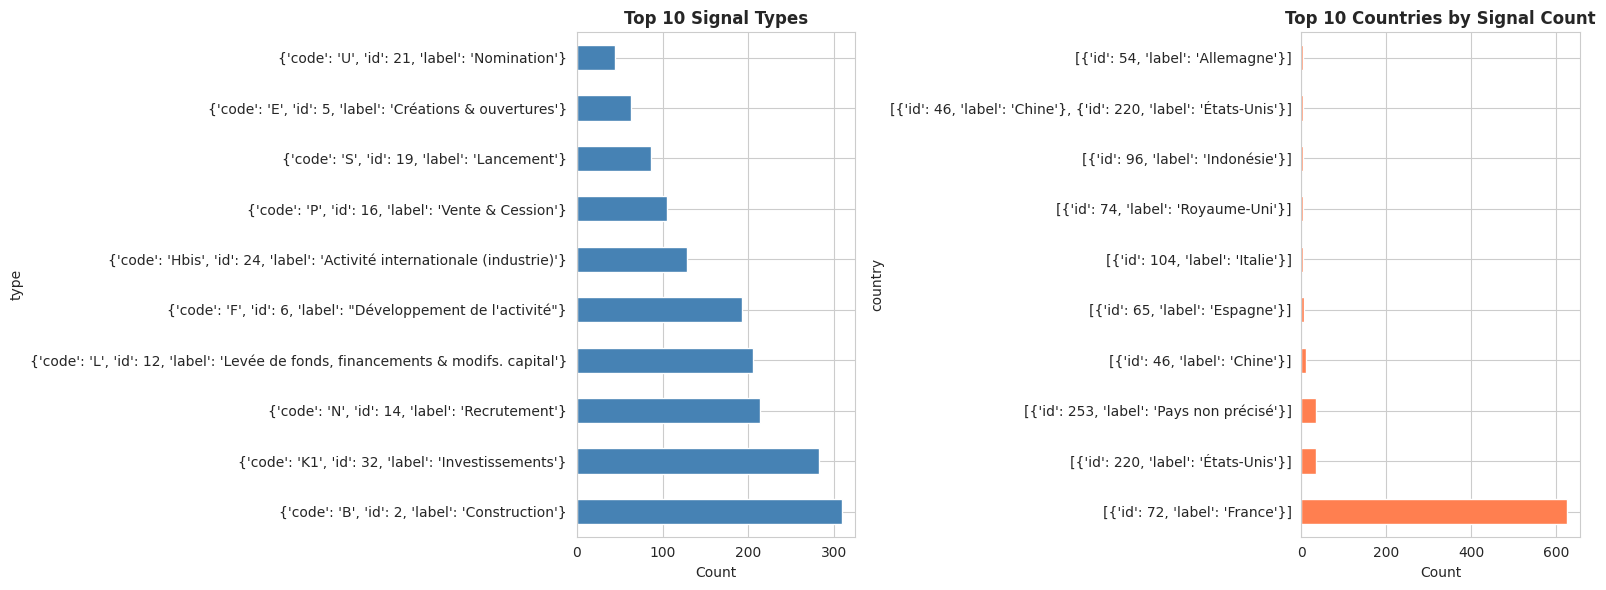

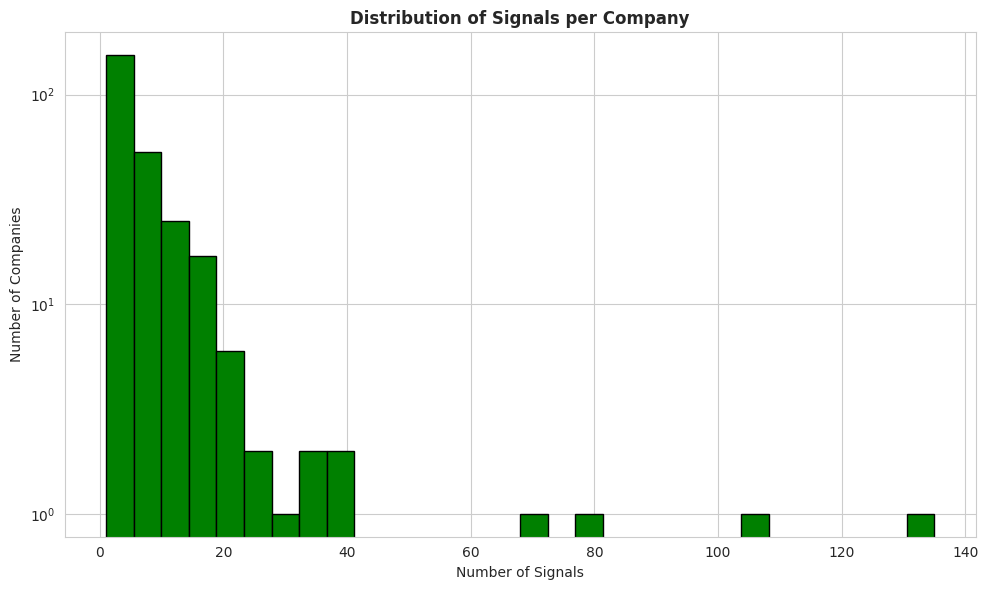

In [9]:
# Visualize signals
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Signal types
if 'type' in df_signals.columns:
    signal_types = df_signals['type'].value_counts().head(10)
    signal_types.plot(kind='barh', ax=axes[0], color='steelblue')
    axes[0].set_title('Top 10 Signal Types', fontweight='bold')
    axes[0].set_xlabel('Count')

# Countries
if 'country' in df_signals.columns:
    countries = df_signals['country'].value_counts().head(10)
    countries.plot(kind='barh', ax=axes[1], color='coral')
    axes[1].set_title('Top 10 Countries by Signal Count', fontweight='bold')
    axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Signals per company distribution
signals_per_company = df_signals.groupby('siren').size()
plt.figure(figsize=(10, 6))
signals_per_company.hist(bins=30, color='green', edgecolor='black')
plt.title('Distribution of Signals per Company', fontweight='bold')
plt.xlabel('Number of Signals')
plt.ylabel('Number of Companies')
plt.yscale('log')
plt.tight_layout()
plt.show()


## Préparation datasets signaux

In [10]:
display(df_signals.head(5))

,company_name,siren,siret,continent,country,departement,publishedAt,isMain,type,createdAt,companies_count,sirets_count
0,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2021-09-30T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2020-09-07T15:14:38+02:00,1,1
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2020-09-08T00:00:00+02:00,True,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-07T15:14:12+02:00,1,1
2,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-09-21T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-20T10:45:13+02:00,1,1
3,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2018-04-05T11:16:18+02:00,1,1
4,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'E', 'id': 5, 'label': 'Créations & o...",2018-04-05T11:15:32+02:00,1,1


In [11]:
df_signals.columns

Index(['company_name', 'siren', 'siret', 'continent', 'country', 'departement',
       'publishedAt', 'isMain', 'type', 'createdAt', 'companies_count',
       'sirets_count'],
      dtype='object')

In [12]:
df_sig = df_signals.copy()

In [13]:
#nettoyage
#transfo date
def to_datetime_robust(series):
    """
    Convertit une série en datetime en gérant :
    - timestamps numériques (en secondes)
    - strings '2024-01-01T...' ou similaires
    """
    if np.issubdtype(series.dtype, np.number):
        return pd.to_datetime(series, unit="s", errors="coerce")
    else:
        return pd.to_datetime(series, errors="coerce")


In [14]:
# SIREN en string
df_sig["siren"] = df_sig["siren"].astype(str)


df_sig["publishedAt_dt"] = to_datetime_robust(df_sig["publishedAt"])
df_sig["createdAt_dt"]   = to_datetime_robust(df_sig["createdAt"])

# Date du signal : priorité publishedAt, sinon createdAt
df_sig["sig_date"] = df_sig["publishedAt_dt"].fillna(df_sig["createdAt_dt"])

# (optionnel mais propre) : enlever les lignes sans date exploitable
df_sig = df_sig[~df_sig["sig_date"].isna()].copy()

# Petit check
display(df_sig['type'].value_counts().head(10))
display(df_sig[["siren", "type", "sig_date"]].head())

/tmp/ipykernel_84130/1304345844.py:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  return pd.to_datetime(series, errors="coerce")
/tmp/ipykernel_84130/1304345844.py:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  return pd.to_datetime(series, errors="coerce")


type
{'code': 'B', 'id': 2, 'label': 'Construction'}                                       309
{'code': 'K1', 'id': 32, 'label': 'Investissements'}                                  282
{'code': 'N', 'id': 14, 'label': 'Recrutement'}                                       214
{'code': 'L', 'id': 12, 'label': 'Levée de fonds, financements & modifs. capital'}    205
{'code': 'F', 'id': 6, 'label': "Développement de l'activité"}                        193
{'code': 'Hbis', 'id': 24, 'label': 'Activité internationale (industrie)'}            129
{'code': 'P', 'id': 16, 'label': 'Vente & Cession'}                                   105
{'code': 'S', 'id': 19, 'label': 'Lancement'}                                          87
{'code': 'E', 'id': 5, 'label': 'Créations & ouvertures'}                              63
{'code': 'U', 'id': 21, 'label': 'Nomination'}                                         45
Name: count, dtype: int64

,siren,type,sig_date
0,015751530,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2021-09-30 00:00:00+02:00
1,015751530,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-08 00:00:00+02:00
2,015751530,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-21 00:00:00+02:00
3,015751530,"{'code': 'F', 'id': 6, 'label': ""Développement...",2018-04-06 00:00:00+02:00
4,015751530,"{'code': 'E', 'id': 5, 'label': 'Créations & o...",2018-04-06 00:00:00+02:00


In [15]:
df_sig.head()

,company_name,siren,siret,continent,country,departement,publishedAt,isMain,type,createdAt,companies_count,sirets_count,publishedAt_dt,createdAt_dt,sig_date
0,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2021-09-30T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2020-09-07T15:14:38+02:00,1,1,2021-09-30 00:00:00+02:00,2020-09-07 15:14:38+02:00,2021-09-30 00:00:00+02:00
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2020-09-08T00:00:00+02:00,True,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-07T15:14:12+02:00,1,1,2020-09-08 00:00:00+02:00,2020-09-07 15:14:12+02:00,2020-09-08 00:00:00+02:00
2,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-09-21T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-20T10:45:13+02:00,1,1,2016-09-21 00:00:00+02:00,2016-09-20 10:45:13+02:00,2016-09-21 00:00:00+02:00
3,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2018-04-05T11:16:18+02:00,1,1,2018-04-06 00:00:00+02:00,2018-04-05 11:16:18+02:00,2018-04-06 00:00:00+02:00
4,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'E', 'id': 5, 'label': 'Créations & o...",2018-04-05T11:15:32+02:00,1,1,2018-04-06 00:00:00+02:00,2018-04-05 11:15:32+02:00,2018-04-06 00:00:00+02:00


In [16]:
import ast

def normalize_type(type_str):
    """
    À partir d'une chaîne du type "{'code': 'L', 'label_short': ..., 'id': 12, 'label': ...}",
    retourne un identifiant unique basé uniquement sur code + id + label.
    """
    try:
        d = ast.literal_eval(type_str)  # convertir la string en dict
        code = d.get("code")
        type_id = d.get("id")
        label = d.get("label")
        return f"{code}_{type_id}_{label}"
    except:
        return None

df_sig["type_normalized"] = df_sig["type"].apply(normalize_type)

In [17]:
df_pivot = (
    df_sig
      .groupby(["siren", "type_normalized"])
      .size()
      .reset_index(name="count")
      .pivot(index="siren", columns="type_normalized", values="count")
      .fillna(0)
)

df_pivot.head(5)

type_normalized,A_1_Aménagement & urbanisme,B_2_Construction,D_4_Litige,D_4_Litiges,E_5_Création & ouverture,E_5_Créations & ouvertures,F_6_Croissance,F_6_Développement de l'activité,G_7_Déménagement,H_8_Activité internationale (tertiaire),...,R_18_Décroissance,S_19_Lancement,U_21_Nomination,W_23_Foncier & bâti,X_25_Actualité entreprise,Y_26_Veille sectorielle,Z1_29_Engagement vert,"Z2_30_Restructuration, Réorganisation",Z3_33_Politique RH & RSE,Z_27_Salon & agenda
siren,,,,,,,,,,,,,,,,,,,,,
015751530,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
046580031,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
057504649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
086781150,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
096780838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [18]:
# diversité des signaux
df_pivot["diversite_signaux"] = (df_pivot > 0).sum(axis=1)
#print(df_pivot["diversite_signaux"].head)


In [19]:
# Volume total de signaux
df_pivot["nb_signaux_total"] = df_pivot.sum(axis=1)
#df_pivot["nb_signaux_total"]

In [20]:
df_recency = (
    df_sig
      .groupby("siren")["sig_date"]
      .max()
      .reset_index()
      .rename(columns={"sig_date": "last_signal_date"})
)
df_recency.head(5)

,siren,last_signal_date
0,015751530,2025-03-03 00:15:21+01:00
1,046580031,2022-08-08 00:00:00+02:00
2,057504649,2024-06-16 00:00:00+02:00
3,086781150,2023-06-29 00:00:00+02:00
4,096780838,2024-03-11 00:00:00+01:00


In [21]:
# date signal la plus récente
reference_date = df_recency["last_signal_date"].max()
reference_date

Timestamp('2025-11-19 00:15:35+0100', tz='UTC+01:00')

In [22]:
df_recency["last_signal_date"] = pd.to_datetime(
    df_recency["last_signal_date"],
    errors="coerce"
)

# Delta en jours
df_recency["recency_jours"] = (reference_date - df_recency["last_signal_date"]).dt.days

df_recency["recency_jours"].head(5)

0    261.0
1      NaN
2      NaN
3      NaN
4    618.0
Name: recency_jours, dtype: float64

In [23]:
# merge signaux et recency par siren pour le model
df_model = df_pivot.merge(df_recency[["siren", "recency_jours"]], on="siren", how="left")
# dégager les NaN dans recency
df_model["recency_jours"] = df_model["recency_jours"].fillna(df_model["recency_jours"].max())
df_model.head()

,siren,A_1_Aménagement & urbanisme,B_2_Construction,D_4_Litige,D_4_Litiges,E_5_Création & ouverture,E_5_Créations & ouvertures,F_6_Croissance,F_6_Développement de l'activité,G_7_Déménagement,...,W_23_Foncier & bâti,X_25_Actualité entreprise,Y_26_Veille sectorielle,Z1_29_Engagement vert,"Z2_30_Restructuration, Réorganisation",Z3_33_Politique RH & RSE,Z_27_Salon & agenda,diversite_signaux,nb_signaux_total,recency_jours
0,015751530,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11,31.0,261.0
1,046580031,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,9.0,4017.0
2,057504649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4.0,4017.0
3,086781150,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,4017.0
4,096780838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5,11.0,618.0


In [24]:
# S'assurer que sig_date est bien au format datetime
df_sig["sig_date"] = pd.to_datetime(df_sig["sig_date"], errors="coerce")

# Optionnel : virer les lignes qui n'ont toujours pas de date exploitable
df_sig = df_sig[~df_sig["sig_date"].isna()].copy()

# nouvelle info mois
df_sig["month"] = df_sig["sig_date"].dt.to_period("M")
last_month = df_sig["month"].max()
three_months_ago = last_month - 2  # last month, -1, -2 = 3 mois
twelve_months_ago = last_month - 11
print(f"Last month : {last_month}, 3 months ago: {three_months_ago}, 1 year ago: {twelve_months_ago}")

Last month : 2025-10, 3 months ago: 2025-08, 1 year ago: 2024-11


/tmp/ipykernel_84130/2343602289.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_sig["month"] = df_sig["sig_date"].dt.to_period("M")


In [25]:
# signaux 1 mois
df_1m = df_sig[df_sig["month"] == last_month]
df_1m = df_1m.groupby("siren").size().reset_index(name="nb_signaux_1m")
df_1m.head(5)

,siren,nb_signaux_1m
0,301164620,2
1,337860456,3
2,509935151,2
3,534948617,1
4,538866740,1


In [26]:
# signaux 3 mois
df_3m = df_sig[(df_sig["month"] >= three_months_ago) & (df_sig["month"] <= last_month)]
df_3m = df_3m.groupby("siren").size().reset_index(name="nb_signaux_3m")
df_3m.head(5)

,siren,nb_signaux_3m
0,099378564,3
1,301164620,2
2,304915432,2
3,321630782,1
4,337860456,3


In [27]:
df_12m = df_sig[(df_sig["month"] >= twelve_months_ago) & (df_sig["month"] <= three_months_ago)]
df_12m = df_12m.groupby("siren").size().reset_index(name="nb_signaux_12m")
df_12m.head()

,siren,nb_signaux_12m
0,310623459,2
1,321630782,1
2,328385562,1
3,328788104,3
4,329302525,2


In [28]:
df_model_update = (
    df_model
      .merge(df_1m, on="siren", how="left")
      .merge(df_3m, on="siren", how="left")
      .merge(df_12m, on="siren", how="left")
)

for col in ["nb_signaux_1m", "nb_signaux_3m", "nb_signaux_12m"]:
    df_model_update[col] = df_model_update[col].fillna(0)

df_model_update.head(5)

,siren,A_1_Aménagement & urbanisme,B_2_Construction,D_4_Litige,D_4_Litiges,E_5_Création & ouverture,E_5_Créations & ouvertures,F_6_Croissance,F_6_Développement de l'activité,G_7_Déménagement,...,Z1_29_Engagement vert,"Z2_30_Restructuration, Réorganisation",Z3_33_Politique RH & RSE,Z_27_Salon & agenda,diversite_signaux,nb_signaux_total,recency_jours,nb_signaux_1m,nb_signaux_3m,nb_signaux_12m
0,015751530,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,11,31.0,261.0,0.0,0.0,0.0
1,046580031,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,9.0,4017.0,0.0,0.0,0.0
2,057504649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,4.0,4017.0,0.0,0.0,0.0
3,086781150,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,3.0,4017.0,0.0,0.0,0.0
4,096780838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,5,11.0,618.0,0.0,0.0,0.0


In [29]:
#label générique : plus l'entreprise à de signaux plus elle est active, juste pour faire tourner le model avec un y
df_model_update["y_gen"] = (
    df_model_update["nb_signaux_total"] +
    df_model_update["nb_signaux_12m"] +
    df_model_update["nb_signaux_3m"] +
    df_model_update["nb_signaux_1m"] +
    df_model_update["diversite_signaux"]
)
df_model_update["y_gen"].head(5)

0    42.0
1    13.0
2     6.0
3     4.0
4    16.0
Name: y_gen, dtype: float64

In [30]:
# normalisation pour meilleure lecture
df_model_update["y_gen_norm"] = (df_model_update["y_gen"] - df_model_update["y_gen"].mean()) / df_model_update["y_gen"].std()
df_model_update.head(5)

,siren,A_1_Aménagement & urbanisme,B_2_Construction,D_4_Litige,D_4_Litiges,E_5_Création & ouverture,E_5_Créations & ouvertures,F_6_Croissance,F_6_Développement de l'activité,G_7_Déménagement,...,Z3_33_Politique RH & RSE,Z_27_Salon & agenda,diversite_signaux,nb_signaux_total,recency_jours,nb_signaux_1m,nb_signaux_3m,nb_signaux_12m,y_gen,y_gen_norm
0,015751530,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,11,31.0,261.0,0.0,0.0,0.0,42.0,1.257083
1,046580031,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,9.0,4017.0,0.0,0.0,0.0,13.0,-0.222718
2,057504649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,4.0,4017.0,0.0,0.0,0.0,6.0,-0.579912
3,086781150,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,3.0,4017.0,0.0,0.0,0.0,4.0,-0.681967
4,096780838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5,11.0,618.0,0.0,0.0,0.0,16.0,-0.069635


In [31]:
df_pivot.columns

Index(['A_1_Aménagement & urbanisme', 'B_2_Construction', 'D_4_Litige',
       'D_4_Litiges', 'E_5_Création & ouverture', 'E_5_Créations & ouvertures',
       'F_6_Croissance', 'F_6_Développement de l'activité', 'G_7_Déménagement',
       'H_8_Activité internationale (tertiaire)',
       'Hbis_24_Activité internationale (industrie)', 'I_9_Fermeture',
       'I_9_Fermetures', 'K1_32_Investissements',
       'L_12_Levée de fonds, financements & modifs. capital',
       'M_13_Licenciement & chômage', 'N_14_Recrutement', 'O_15_RJ & LJ',
       'P_16_Vente & Cession', 'R_18_Décroissance', 'S_19_Lancement',
       'U_21_Nomination', 'W_23_Foncier & bâti', 'X_25_Actualité entreprise',
       'Y_26_Veille sectorielle', 'Z1_29_Engagement vert',
       'Z2_30_Restructuration, Réorganisation', 'Z3_33_Politique RH & RSE',
       'Z_27_Salon & agenda', 'diversite_signaux', 'nb_signaux_total'],
      dtype='object', name='type_normalized')

In [32]:
# prendre toutes les colonnes de pivot signaux sans les sous-labels et les features créées
features_list_1 = [
    col for col in df_pivot.columns
    if col not in ["diversite_signaux", "nb_signaux_total"]
]

# liste des nouveaux indicateurs
features_list_2 = ["diversite_signaux",
    "nb_signaux_total",
    "recency_jours",
    "nb_signaux_1m",
    "nb_signaux_3m",
    "nb_signaux_12m"
]

features = features_list_1 + features_list_2
display(features)

['A_1_Aménagement & urbanisme',
 'B_2_Construction',
 'D_4_Litige',
 'D_4_Litiges',
 'E_5_Création & ouverture',
 'E_5_Créations & ouvertures',
 'F_6_Croissance',
 "F_6_Développement de l'activité",
 'G_7_Déménagement',
 'H_8_Activité internationale (tertiaire)',
 'Hbis_24_Activité internationale (industrie)',
 'I_9_Fermeture',
 'I_9_Fermetures',
 'K1_32_Investissements',
 'L_12_Levée de fonds, financements & modifs. capital',
 'M_13_Licenciement & chômage',
 'N_14_Recrutement',
 'O_15_RJ & LJ',
 'P_16_Vente & Cession',
 'R_18_Décroissance',
 'S_19_Lancement',
 'U_21_Nomination',
 'W_23_Foncier & bâti',
 'X_25_Actualité entreprise',
 'Y_26_Veille sectorielle',
 'Z1_29_Engagement vert',
 'Z2_30_Restructuration, Réorganisation',
 'Z3_33_Politique RH & RSE',
 'Z_27_Salon & agenda',
 'diversite_signaux',
 'nb_signaux_total',
 'recency_jours',
 'nb_signaux_1m',
 'nb_signaux_3m',
 'nb_signaux_12m']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# pour le split
X = df_model_update[features]
y = df_model_update["y_gen_norm"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [36]:
from xgboost import XGBRegressor

pipe_xgb = Pipeline([
    ("preprocess", numeric_pipe),
    ("model", XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

pipe_xgb.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [37]:
from sklearn.metrics import r2_score, mean_absolute_error

pred_test = pipe_xgb.predict(X_test)

print("R² =", r2_score(y_test, pred_test))
print("MAE =", mean_absolute_error(y_test, pred_test))

R² = 0.9041038961411331
MAE = 0.07819553929590857


In [38]:
df_model_update["signal_score_model"] = pipe_xgb.predict(X)

In [39]:
signal_features = df_model_update[[
    "siren",
    "signal_score_model",
    "nb_signaux_total",
    "nb_signaux_12m",
    "nb_signaux_3m",
    "nb_signaux_1m",
    "diversite_signaux",
    "recency_jours"
]]

In [40]:
display(signal_features)

,siren,signal_score_model,nb_signaux_total,nb_signaux_12m,nb_signaux_3m,nb_signaux_1m,diversite_signaux,recency_jours
0,015751530,1.256725,31.0,0.0,0.0,0.0,11,261.0
1,046580031,-0.217909,9.0,0.0,0.0,0.0,4,4017.0
2,057504649,-0.580589,4.0,0.0,0.0,0.0,2,4017.0
3,086781150,-0.682501,3.0,0.0,0.0,0.0,1,4017.0
4,096780838,-0.072267,11.0,0.0,0.0,0.0,5,618.0
...,...,...,...,...,...,...,...,...
261,901761114,-0.575072,4.0,0.0,0.0,0.0,2,309.0
262,916420128,0.235289,16.0,0.0,0.0,0.0,6,4017.0
263,927050013,-0.636180,4.0,0.0,0.0,0.0,1,4017.0
264,947351656,0.186916,15.0,0.0,0.0,0.0,6,4017.0


## Analyse résultat

<Axes: >

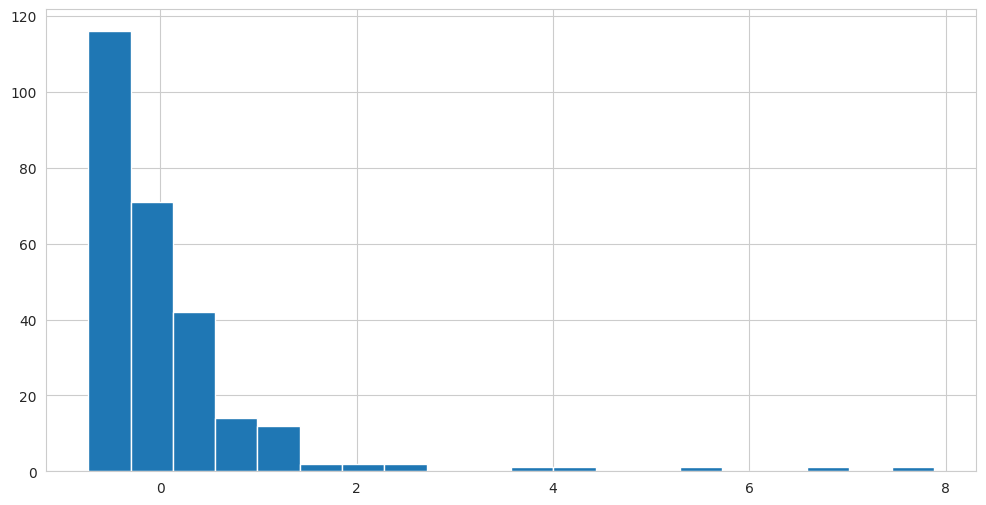

In [41]:
# distribution score
signal_features["signal_score_model"].describe()
signal_features["signal_score_model"].hist(bins=20)

In [42]:
# Features importantes

xgb_model = pipe_xgb.named_steps["model"]

importances = xgb_model.feature_importances_
feature_names = X.columns

feature_importance = (
    pd.DataFrame({"feature": feature_names, "importance": importances})
    .sort_values("importance", ascending=False)
)

display(feature_importance.head(20))

,feature,importance
10,Hbis_24_Activité internationale (industrie),0.466520
7,F_6_Développement de l'activité,0.205385
30,nb_signaux_total,0.138233
29,diversite_signaux,0.115441
16,N_14_Recrutement,0.030663
14,"L_12_Levée de fonds, financements & modifs. ca...",0.004665
25,Z1_29_Engagement vert,0.003990
1,B_2_Construction,0.003821
9,H_8_Activité internationale (tertiaire),0.003744
6,F_6_Croissance,0.003663


### Interprétation / A DISCUTER AVEC LA TEAM

| Rank  | Feature                            | Importance | Interprétation                          |
| ----- | ---------------------------------- | ---------- | --------------------------------------- |
| **1** | **Hbis – International industrie** | **0.467**  | Signal n°1 du modèle                    |
| **2** | **F – Développement**              | **0.205**  | Très fort indicateur de dynamisme       |
| **3** | **nb_signaux_total**               | **0.138**  | Intensité globale des signaux           |
| **4** | **diversite_signaux**              | **0.115**  | Multi-activité / diversité structurelle |
| 5     | N – Recrutement                    | 0.031      | Croissance RH                           |
| 6     | L – Levée de fonds                 | 0.0046     | Croissance financière                   |
| 7     | Z1 – Engagement vert               | 0.0039     | Signal écologique                       |
| 8     | B – Construction                   | 0.0038     | Développement physique                  |
| 9     | H – International tertiaire        | 0.0037     | Complète Hbis                           |
| 10    | F – Croissance                     | 0.0036     | Sous-composante du F_dev                |
| 11    | Investissements (K1)               | 0.0036     | Capex / Croissance structurante         |
| 12    | S – Lancement                      | 0.0034     | Expansion commerciale                   |
| 13    | W – Foncier / bâti                 | 0.0031     | Infrastructure stratégique              |
| 14    | E – Créations / ouvertures         | 0.0027     | Expansion early-stage                   |
| 15    | O – RJ & LJ                        | 0.0018     | Risque / négatif                        |
| 16    | nb_signaux_1m                      | 0.0012     | Très faible impact                      |
| 17    | Z2 – Réorganisation                | 0.00115    | Signal structurel interne               |
| 18    | G – Déménagement                   | 0.00096    | Opérationnel                            |
| 19    | P – Vente & cession                | 0.00086    | Signal négatif ou neutre                |
| 20    | nb_signaux_12m                     | 0.00085    | Très faible impact                      |


#### ⭐ 1) Le signal dominant absolu : l’internationalisation (Hbis)

Presque 50 % du poids total.

C’est énorme, et l’interprétation est claire :
dans ton dataset, les entreprises avec signal Hbis sont les plus actives,
Hbis agit comme un méga-indicateur de dynamisme économique,
le modèle y voit un très bon proxy du score final.

➡️ Si ce comportement est cohérent métier → parfait
➡️ Si ce n’est pas complètement cohérent → il faudra pondérer / normaliser

Mais ici, décidento met lui-même beaucoup l’accent sur les signaux internationaux → cohérent métier.

#### ⭐ 2) Le développement (F) est le 2ᵉ pilier du modèle

Avec 20 % d’importance.

C’est exactement ce qu’on veut :
croissance interne,
nouveaux projets,
développement d’activité.

➡️ Le modèle comprend maintenant la structure économique.

#### ⭐ 3) Intensité & diversité redeviennent normales (≈ 25 % cumulés)

nb_signaux_total → 13.8 %
diversity_signaux → 11.5 %

Dans ton modèle précédent, la diversité était n°1 → mauvaise signalisation.
Maintenant elle est moins importante qu’Hbis et F, ce qui est beaucoup plus correct.

➡️ Le nettoyage du pivot a rendu ton modèle beaucoup plus métier que structurel.

#### ⭐ 4) Recrutement (N) remonte très bien (3 %)

Le modèle reconnaît que :
“Une entreprise qui recrute, c’est une entreprise qui bouge.”
Très cohérent métier.

#### ⭐ 5) Levées de fonds (L) — impact faible mais réel

0.4 % → faible mais non nul
C’est normal : peu de levées dans ton dataset.

➡️ Le modèle capte quand même l'information.

#### ⭐ 6) Les signaux stratégiques ressortent bien

Petit impact individuel mais cumul intéressant :
Croissance (F2)
Investissements (K1)
Lancements (S)
Créations (E)
Foncier & bâti (W)

Ce sont tous des signaux métier que Decidento valorise.
👍 Très bon signe.

#### ⭐ 7) Les signaux négatifs (RJ/LJ, Vente/Cession) apparaissent faiblement

→ Attendu : le modèle n’a pas appris une cible qui pénalise les signaux négatifs.
Mais leur présence faible montre que le dataset contient ces signaux suffisamment rarement pour ne pas changer la structure du score.

#### ⭐ 8) Les signaux récents (1m / 12m) ont un poids presque nul

→ attendu : aucune variance récente.

### Résumé

#### 📌 1. Le score produit un classement très discriminant

La distribution est très asymétrique :
80% des entreprises ont un score faible ou moyen.

Une petite minorité (5–10%) ressort nettement avec des scores très élevés.
→ Ce sont les entreprises à fort potentiel / forte dynamique.

#### 📌 2. Le score est principalement expliqué par :

La diversité des signaux (38 %) → les entreprises actives sur plusieurs fronts.
Les signaux d’internationalisation / extension (26 %).
Les signaux de développement / croissance (14 %).
Le volume total de signaux (13 %).

#### 📌 3. Le modèle capture un concept cohérent : “Dynamisme économique multi-dimensionnel”

Exemples concrets :
Une entreprise avec 32 signaux, 12 types, 261 jours de recency, score = 1.23
Une entreprise avec 3 signaux, 1 type, recency > 4000 jours, score = -0.66
Le modèle récompense les entreprises qui bougent réellement, pas juste celles qui ont un signal récurrent.

#### 📌 4. C’est un excellent sous-modèle pour le futur modèle global

Le score signal sera une des features les plus puissantes dans le modèle final, aux côtés :
du score financier,
du score NLP,
des informations internes Decidento.

#### En bref, suite à correction problème sur les années et labels
Après correction du pivot et nettoyage des labels, le modèle s’appuie désormais sur des signaux 100 % métier :
l’internationalisation (Hbis), la croissance/développement (F), l’intensité globale et la diversité.
Les signaux stratégiques comme recrutement, levées, investissements, lancements et créations ressortent bien, ce qui valide l’alignement métier.
Les signaux récents n’ont pas d’impact car le dataset contient très peu d’activité récente.

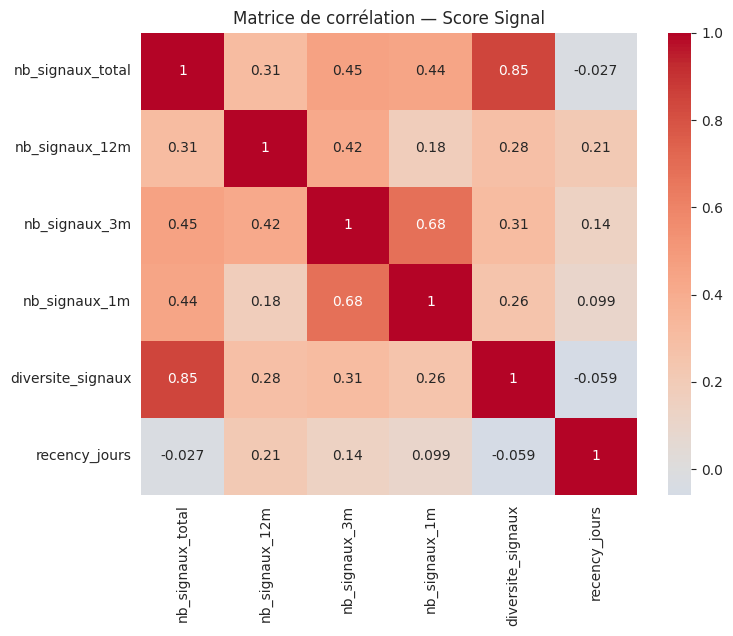

In [43]:
#pivot_cols = df_pivot.columns.tolist()

numeric_cols = [
    "nb_signaux_total",
    "nb_signaux_12m",
    "nb_signaux_3m",
    "nb_signaux_1m",
    "diversite_signaux",
    "recency_jours",
]

corr_cols = numeric_cols
#corr_cols = numeric_cols + pivot_cols

# Filtrer pour garder uniquement les colonnes existantes
corr_cols = [col for col in corr_cols if col in df_model_update.columns]

corr_df = df_model_update[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation — Score Signal")
plt.show()

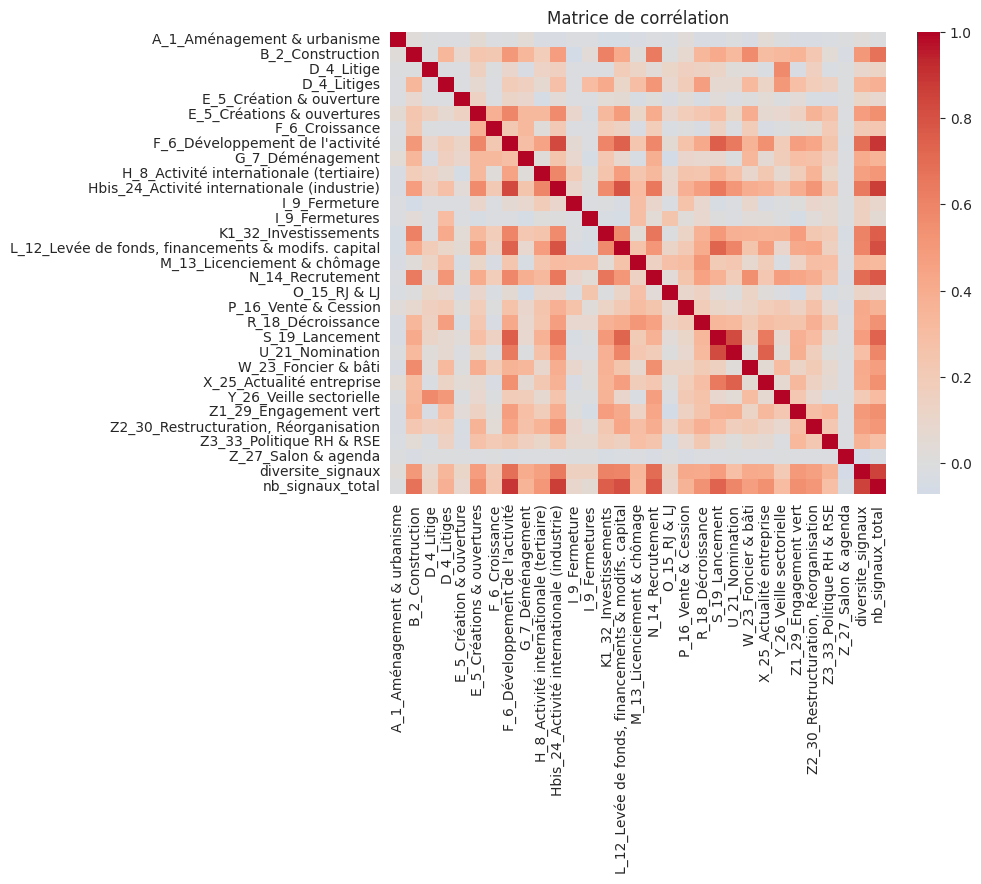

In [44]:
pivot_cols = df_pivot.columns.tolist()

corr_cols2 = pivot_cols

# Filtrer pour garder uniquement les colonnes existantes
corr_cols2 = [col for col in corr_cols2 if col in df_model_update.columns]

corr_df2 = df_model_update[corr_cols2].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df2, annot=False, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.show()